### Assignment 01
Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loads the dataset from Google Drive using pandas.
df = pd.read_csv('/content/drive/MyDrive/BE_SEM_II_Lab/BostonHousing.csv')

df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

,0
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,5
Age,0
Distance,0
rad,0
tax,0


In [6]:
# Fills missing values in the 'rm' column with the mean of that column.

df['rm'].fillna(df['rm'].mean(), inplace=True)

df.isnull().sum()

<ipython-input-6-35aabb98838e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(), inplace=True)


,0
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,0
Age,0
Distance,0
rad,0
tax,0


In [7]:
# Splits the dataset into: `x`: Features  `y`: Target variable
x = df.drop('medv', axis=1)
y=df['medv']


In [8]:
# Splits data into training and testing sets for model training and evaluation.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [9]:
# Scale the feature values between 0 and 1 using MinMaxScaler, Prevents domination
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# Create a neural network with:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(128, activation='relu'))      # One hidden layer (Dense(128) with ReLU activation).
model.add(Dense(1, activation='linear'))      # One output layer with a linear activation (for regression).

# Compiles the model
model.compile(loss='mae', optimizer='adam', metrics=['mse', 'mae'])


In [11]:
# Trains the model on the training data for 50 epochs

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 23.0073 - mae: 23.0073 - mse: 627.8891
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.0107 - mae: 22.0107 - mse: 578.9384  
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1159 - mae: 21.1159 - mse: 536.4251 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.5226 - mae: 20.5226 - mse: 517.8531 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.8317 - mae: 19.8317 - mse: 483.8231 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.2949 - mae: 18.2949 - mse: 436.5617 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.9338 - mae: 16.9338 - mse: 390.8536 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.5257 - mae: 15.5257 - mse: 335.9783 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.1288 - mae: 15.1288 - mse: 339.8752 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1472 - mae: 13.1472 - mse: 274.2018 
Epoch 11/50
12/12 ━

In [12]:
# Evaluates the model’s performance on the test data
metrics = model.evaluate(x_test, y_test)
metrics


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8936 - mae: 3.8936 - mse: 31.5245 


[4.000225067138672, 35.14029312133789, 4.000225067138672]

In [13]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(x_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [14]:
# Reshapes the actual target values for comparison with predictions (makes it a 2D array)
y_test = np.array(y_test).reshape(-1, 1)

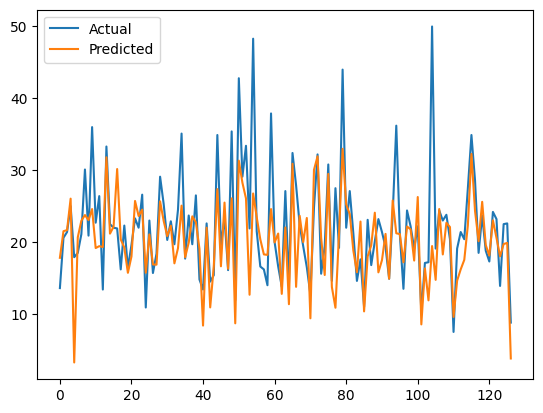

In [15]:
# Plots the actual vs predicted values of medv.
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()